<a href="https://www.kaggle.com/code/tusharkhare06/creditcardfraud?scriptVersionId=241077319" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv') # Load CSV file
df.head() # Show first few rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:

# Shape of the dataset
print("Rows, Columns:", df.shape)

# Data types and null values
df.info()

# Basic statistics
df.describe()

Rows, Columns: (284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-n

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.369007e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.500885e-15,-5.620335e-16,1.149614e-16,-2.426963e-15,...,1.596686e-16,-3.576577e-16,2.650499e-16,4.472317e-15,5.109395e-16,1.686100e-15,-3.662399e-16,-1.225457e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df['Class'].value_counts() #tells how many transactions are fraud (1) vs non-fraud (0)

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
count = df['Class'].value_counts()
count1 = df['Class'].value_counts(normalize=False)
print(count)
print(count1) #both r smae as its default is false and it will count only 

Class
0    284315
1       492
Name: count, dtype: int64
Class
0    284315
1       492
Name: count, dtype: int64


In [8]:
fraud_percentage = df['Class'].value_counts(normalize= True) * 100
print(fraud_percentage) #normalize=True gives proportions instead of raw counts and *100 makes it percentage

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


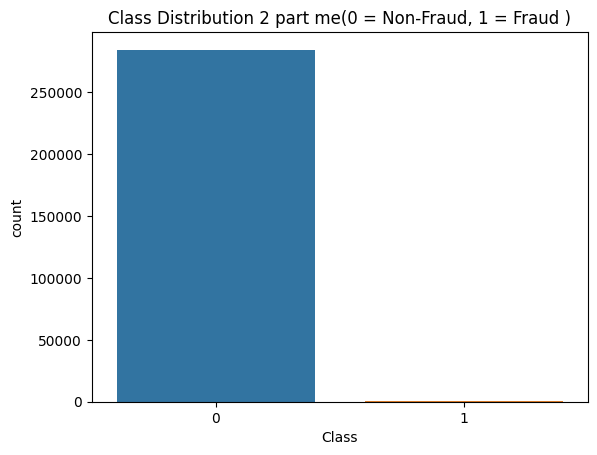

In [9]:
sns.countplot(x='Class', data=df) #sns.countplot(x=df['Class']) both r same
plt.title('Class Distribution 2 part me(0 = Non-Fraud, 1 = Fraud )') #add title
plt.show()

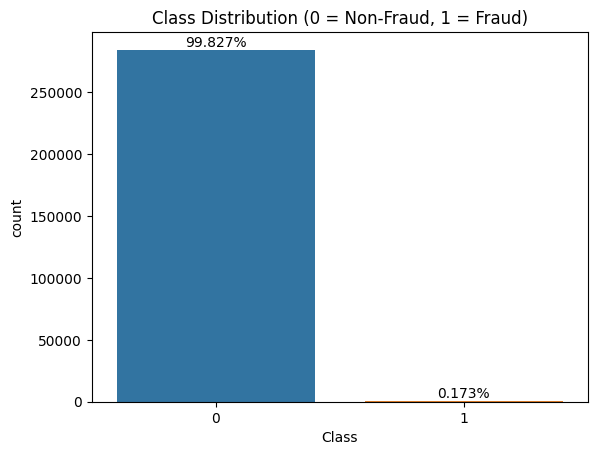

In [10]:
ax = sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0 = Non-Fraud, 1 = Fraud)')

# Annotate with percentage
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.3f}%'
    x = p.get_x() + p.get_width() / 2 #get_x() and get_width() are built-in methods that come with each patch (bar) object in Matplotlib.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

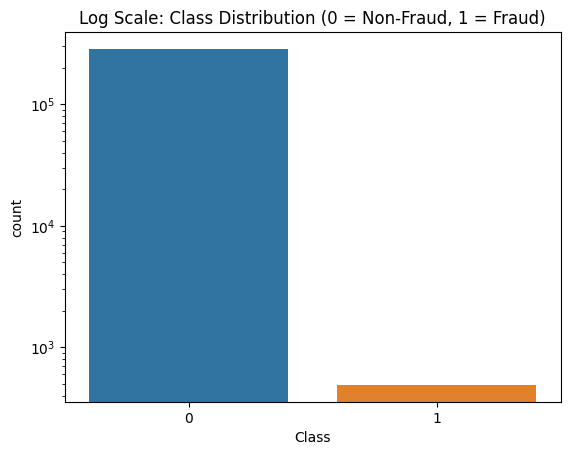

In [11]:
ax = sns.countplot(x='Class', data=df)
plt.yscale('log')  # This is key
plt.title('Log Scale: Class Distribution (0 = Non-Fraud, 1 = Fraud)')
plt.show()

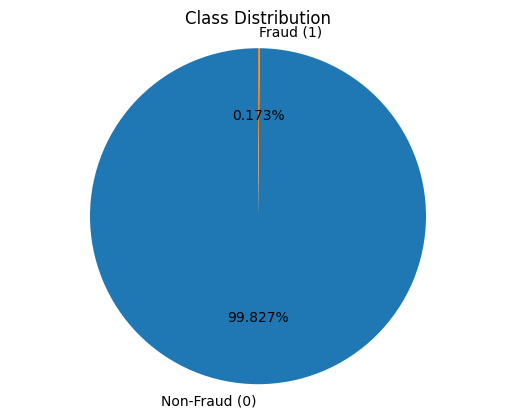

In [12]:
class_counts = df['Class'].value_counts()
labels = ['Non-Fraud (0)', 'Fraud (1)']
plt.pie(class_counts, labels=labels, autopct='%1.3f%%', startangle=90)
plt.title('Class Distribution')
plt.axis('equal')
plt.show()

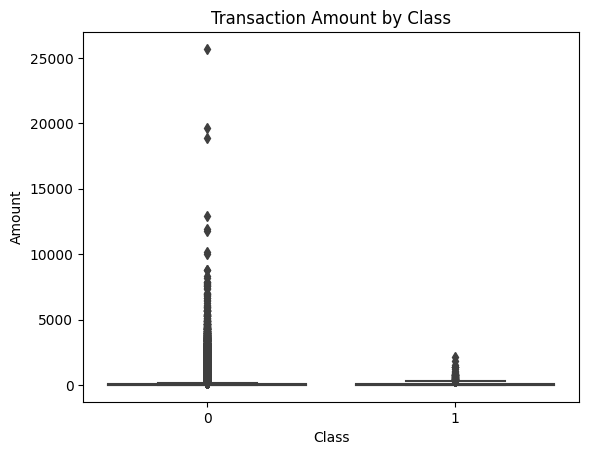

In [13]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount by Class')
plt.show()

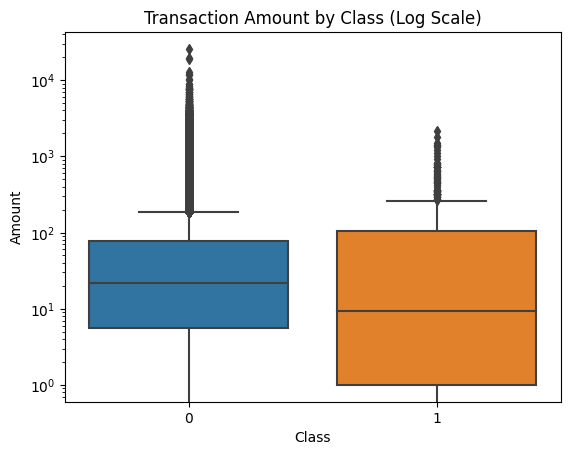

In [14]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.yscale('log')  # Logarithmic scale to zoom out high values
plt.title('Transaction Amount by Class (Log Scale)')
plt.show()

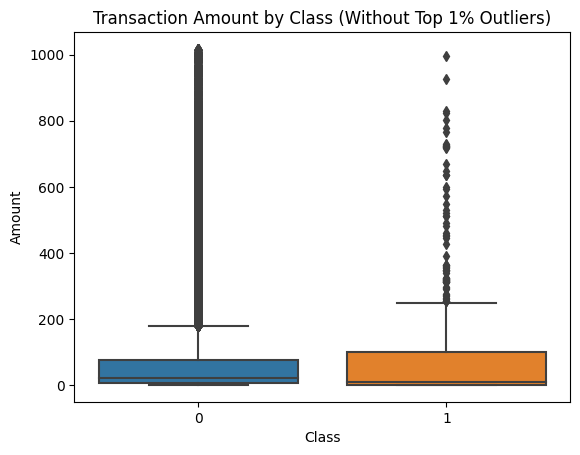

In [15]:
# Remove top 1% of transaction amounts
filtered_df = df[df['Amount'] < df['Amount'].quantile(0.99)]

sns.boxplot(x='Class', y='Amount', data=filtered_df)
plt.title('Transaction Amount by Class (Without Top 1% Outliers)')
plt.show()

In [16]:
df['Hour'] = df['Time'] // 3600

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


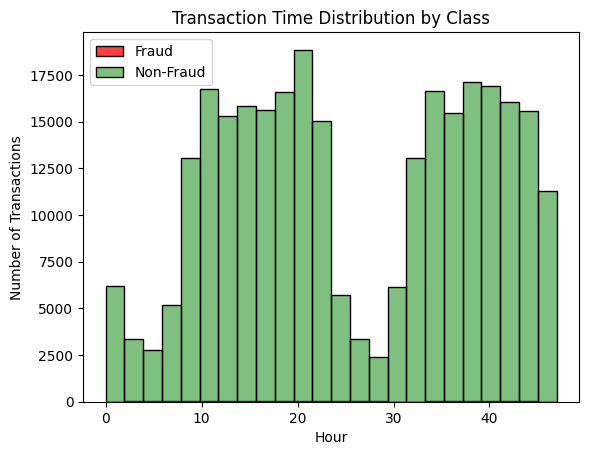

In [17]:
sns.histplot(data=df[df['Class'] == 1], x='Hour', bins=24, color='red', label='Fraud')
sns.histplot(data=df[df['Class'] == 0], x='Hour', bins=24, color='green', label='Non-Fraud', alpha=0.5) #alpha :transparency
plt.legend()
plt.title('Transaction Time Distribution by Class')
plt.xlabel('Hour')
plt.ylabel('Number of Transactions')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


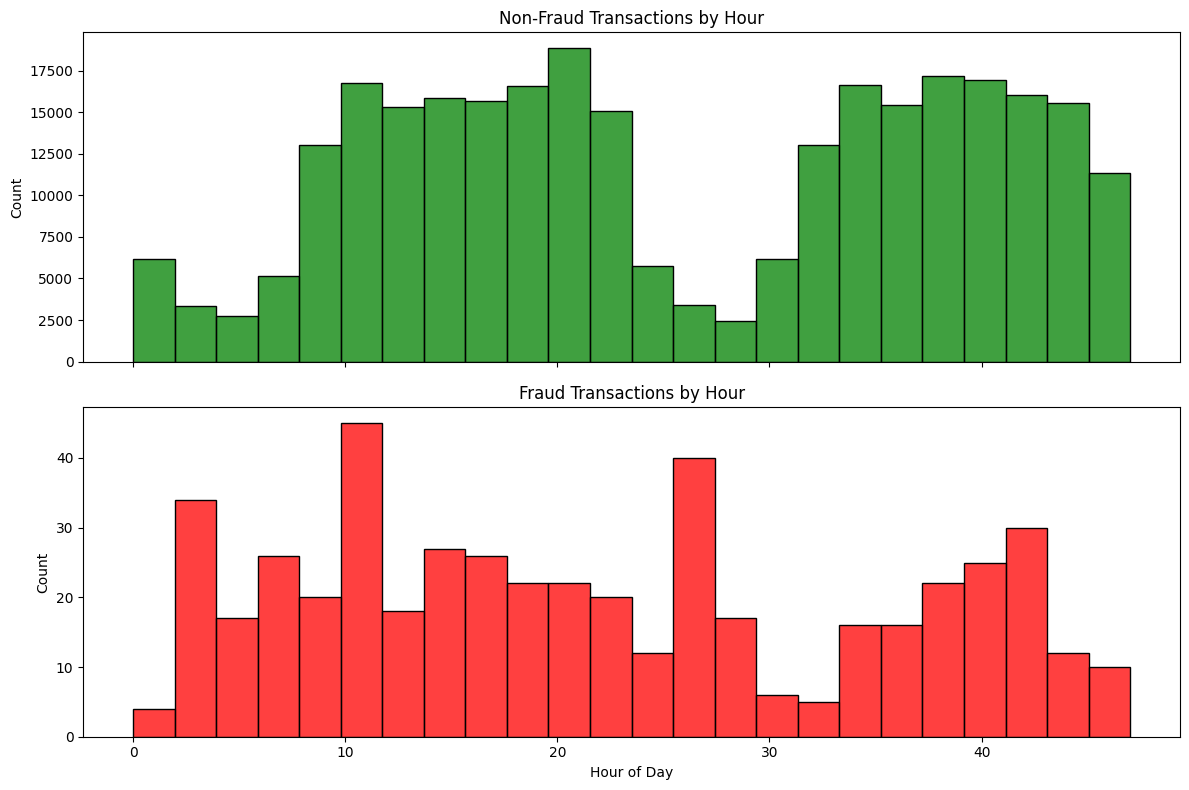

In [18]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
#This creates a figure with 2 vertically stacked subplots (2 rows, 1 column).
#figsize=(12, 8) makes the overall plot wide and tall enough for clarity.size of 12 inches wide and 8 inches tall.

#sharex=True means both plots will share the same x-axis (which is Hour), making comparisons easy.
# sharey=True means both plots will use the same Y-axis scale


sns.histplot(data=df[df['Class'] == 0], x='Hour', bins=24, color='green', ax=axes[0])
axes[0].set_title('Non-Fraud Transactions by Hour') 
axes[0].set_ylabel('Count') #ax=axes[0] tells seaborn to draw the plot on the top subplot.

sns.histplot(data=df[df['Class'] == 1], x='Hour', bins=24, color='red', ax=axes[1])
axes[1].set_title('Fraud Transactions by Hour')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Count') #ax=axes[1] tells seaborn to draw the plot on the top subplot.

plt.tight_layout()#Drawn on the bottom subplot (axes[1]).
plt.show()


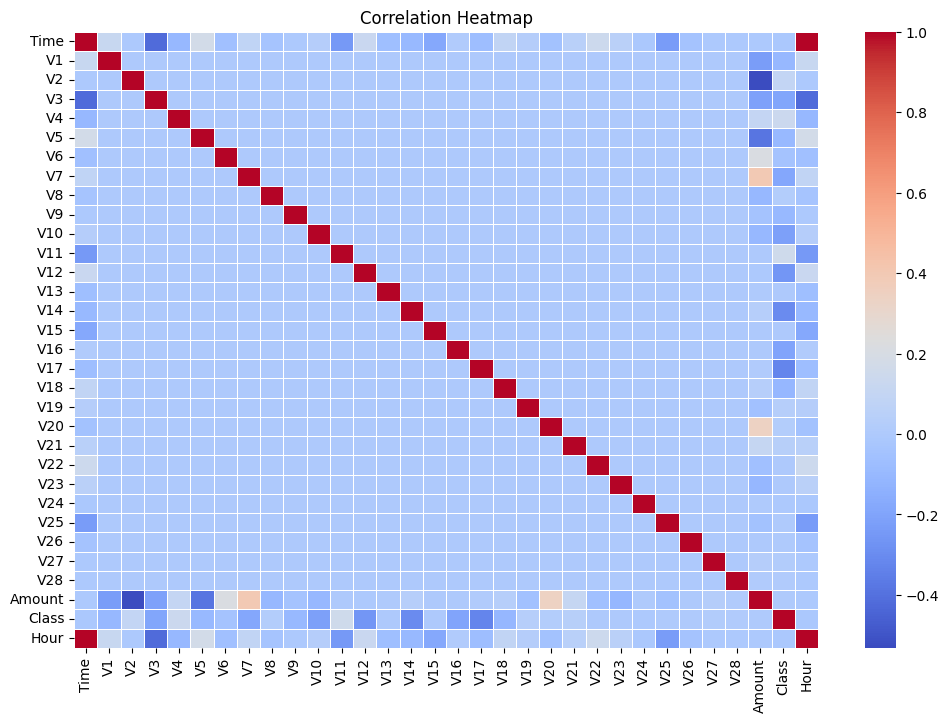

In [19]:
plt.figure(figsize=(12, 8)) #Creates a new figure with a size of 12 inches wide and 8 inches tall.
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop('Class', axis=1)  # input features
y = df['Class']               # target variable

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # probabilities for ROC

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

# Accuracy and confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

Accuracy: 0.9991748885221726
[[56851    13]
 [   34    64]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.65      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.8264163044227257


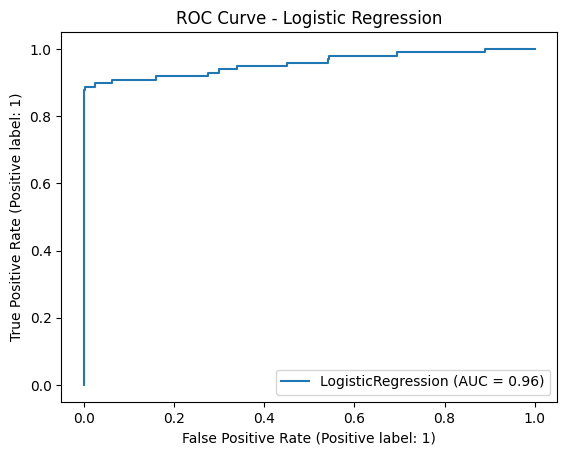

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()